# Описание проекта

<div class="alert alert-info">
Привет! Меня зовут Никита Мишин и я буду твоим ревьюером по этому проекты.
Для простоты предлагаю общение на 'ты'. Буду предполагать, что ты не против:) 
Если более предпочтительно обращение на 'Вы', пиши, не стесняйся.
Также если будут возникать вопросы, аналогично, пиши:)

Предлагаю работать в известном тебе итеративном формате.
Итерация состоит в моей проверке твоего решения. 
После решения могут остаться какие-то недочеты, которые я попрошу тебя устранить, ты их исправляешь и я проверяю твои решения.
    Оставленные мною комментарии могут быть разного вида:
   
    - зеленый: элегантные решения, которые тебе стоит запомнит и в дальнейшем взять на вооружение:) 
    
    - желтый: сигнал о том, что есть некритичная вещь(не всегда ошибка), что нужно точно поправить в следующей работе, даже желательно в этой (полезно, в первую очередь, для тебя:) ).Также это рекомендации на будущее    

    - красный: недочет, который нужно исправить в этой работе, для того, чтобы она была принята
    
    - синий: полезная информация, доп ресурсы, "вопросы на подумать"

Также попрошу не удалять мои комментарии:) <a class="tocSkip">
</div>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Откроем файл с данными и изучм общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
from scipy import stats as st
from random import sample

In [4]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
games.sample(n = k, random_state = 0)

NameError: name 'k' is not defined

*Анализируя полученную информацию видим различный регистр в написании столбцов, наличие пропусков в данных по столбцам `name`, `genre`, `year_of_release`, `critic_score`, `critic_score`, `rating`. Далее проверим суть пропусков и примем решение что с ними делать.*

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Для разнообразия полезно использовать метод sample  с зафиксированным random state --- будет выдавать случайные строки из датасета
</div>

# Шаг 2. Подготовим данные

*Заменим названия столбцов (приведём к нижнему регистру).*

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
games.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],axis = 'columns',inplace = True)

In [7]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*Преобразуем данные в нужные типы.*

* `year_of_release`  и `critic_score` в целочисленный тип данных:

In [8]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], downcast = 'integer')

In [9]:
games['critic_score'] = pd.to_numeric(games['critic_score'], downcast = 'integer')

* `user_score`  в тип с плавающей запятой:

In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], downcast = 'float', errors ='coerce')

*Обработаем пропуски при необходимости:*

* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

*`name`*

In [11]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Две строки с пропущенным наименованием игр, жанра и т.д. - предлагаем удалить*

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Допустимое решение, молодец!</div>

In [13]:
games.dropna(subset = ['name'], inplace = True)

In [14]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


*`year_of_release`*

In [15]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Часть пропусков можно было бы заменить на год выпуска игры на другой платформе, или же вытащить из названия самой игры</div>

*Пока не решили что с ними делать, пока оставим так, далее будем использовать срез при необходимости.*

*`user_score`*

In [16]:
games['user_score'].unique()

array([8.        ,        nan, 8.30000019, 8.5       , 6.5999999 ,
       8.39999962, 8.60000038, 7.69999981, 6.30000019, 7.4000001 ,
       8.19999981, 9.        , 7.9000001 , 8.10000038, 8.69999981,
       7.0999999 , 3.4000001 , 5.30000019, 4.80000019, 3.20000005,
       8.89999962, 6.4000001 , 7.80000019, 7.5       , 2.5999999 ,
       7.19999981, 9.19999981, 7.        , 7.30000019, 4.30000019,
       7.5999999 , 5.69999981, 5.        , 9.10000038, 6.5       ,
       8.80000019, 6.9000001 , 9.39999962, 6.80000019, 6.0999999 ,
       6.69999981, 5.4000001 , 4.        , 4.9000001 , 4.5       ,
       9.30000019, 6.19999981, 4.19999981, 6.        , 3.70000005,
       4.0999999 , 5.80000019, 5.5999999 , 5.5       , 4.4000001 ,
       4.5999999 , 5.9000001 , 3.9000001 , 3.0999999 , 2.9000001 ,
       5.19999981, 3.29999995, 4.69999981, 5.0999999 , 3.5       ,
       2.5       , 1.89999998, 3.        , 2.70000005, 2.20000005,
       2.        , 9.5       , 2.0999999 , 3.5999999 , 2.79999

*Значение `tbd` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена. Поэтому предлагаем заменить это значение на `nan`, так как заменить средним или медианой или .*

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, логичное решение
</div>

In [17]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


*Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:*

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Шаг 3. Проведем исследовательский анализ данных

*Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

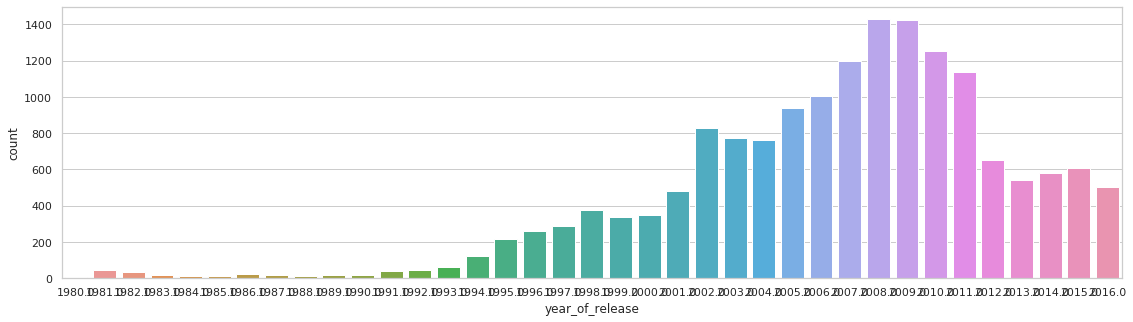

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (19, 5))
sns.countplot(data = games.query('year_of_release != "nan"'), x = 'year_of_release')

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
1) xticks стоило повернуть на 45-90 градусов, чтобы друг на друга года не залезали

2) куда-то пропали названия графиков:)
</div>

*Для ответа на вопрос "Важны ли данные за все периоды?" построим ящик с усами:*

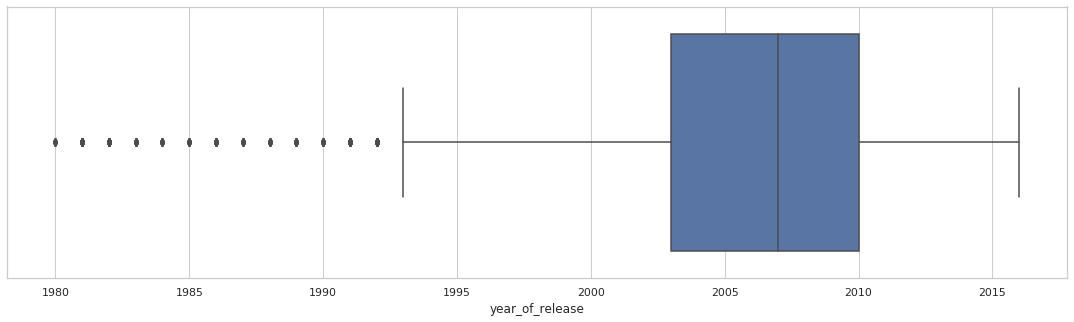

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (19, 5))
sns.boxplot(data = games.sort_values(by = 'year_of_release'), x = 'year_of_release')

In [22]:
games['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<i>
    Как видим, данные за все периоды нам не важны. Определим границы согласно графика: Q1 - 1,5 * IQR = 2003 - 1,5 * 7 = 1993 год, получили левый ус, теперь правый: Q3 + 1,5 * IQR = 2010 + 1,5 * 7 = 2021, такой точки у нас нет, берем за правый ус максимальное значение из выборки. Таким образом можно рассматривать данные в периоде с 1993 по 2016 год.
</i>

<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Хм, все же исходя из графика и временного контекста --- очень много революций произошло с играми за последние 30 лет. Как считаешь?</div>

<b>Посмотрим, как менялись продажи по платформам:</b>

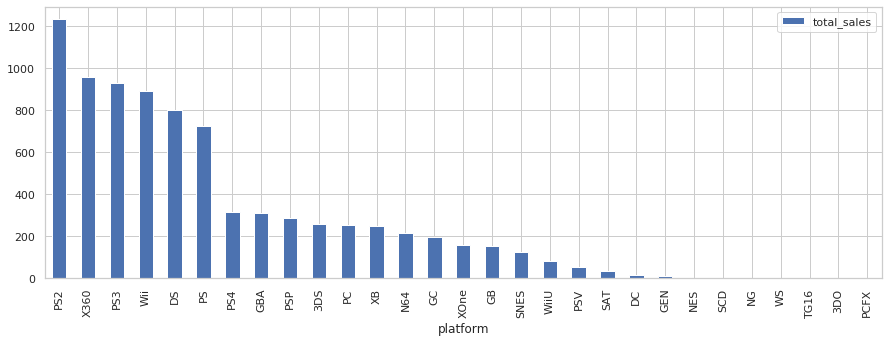

In [23]:
games.query('1993 <= year_of_release <= 2016').pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).plot(kind = 'bar', figsize = (15,5))

*Выберем ТОП5 наименований платформ:*

In [24]:
best_total_sales = list(games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).index[:5])

In [25]:
best_total_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS']

*Построим распределение по годам:*

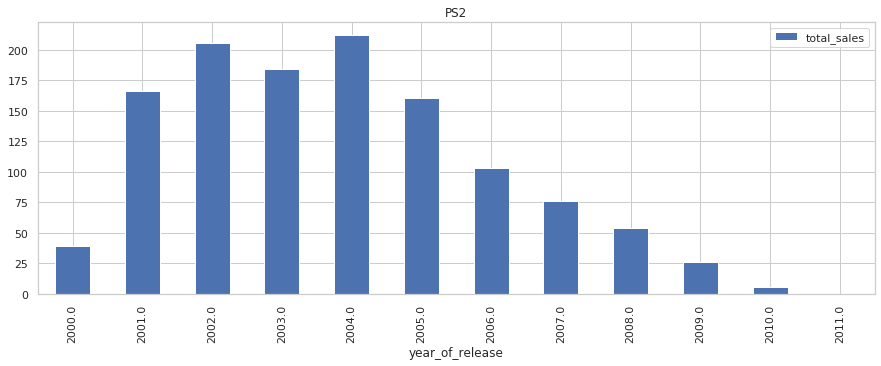

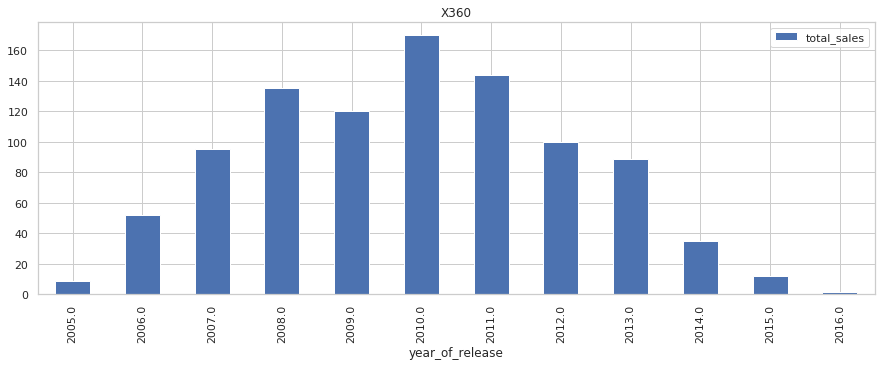

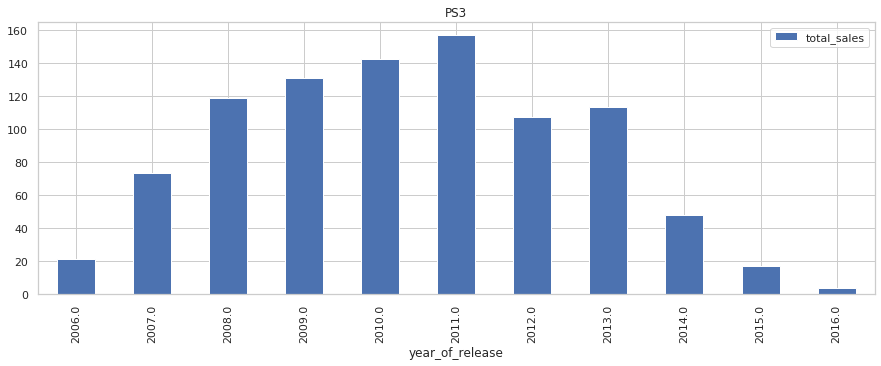

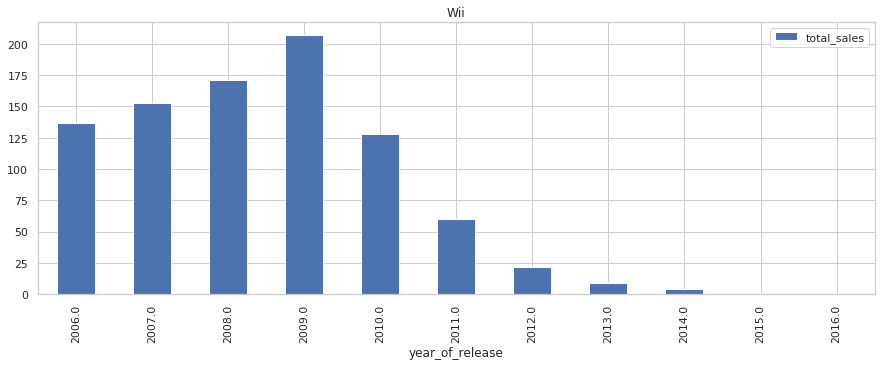

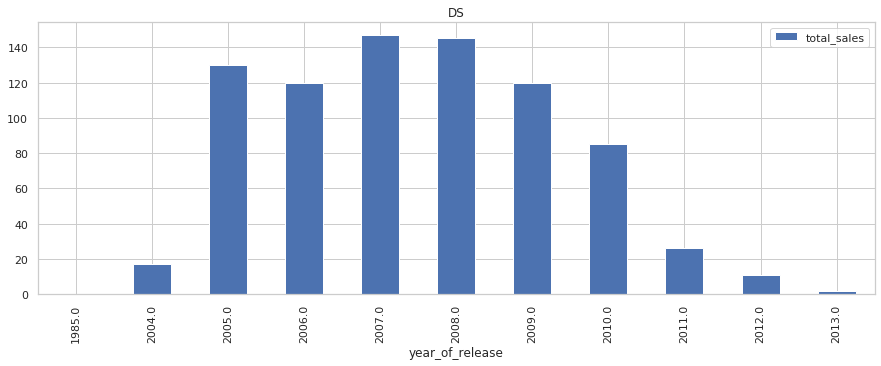

In [26]:
for platform in best_total_sales:
    games[games['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,5))
    plt.title(platform)

<i>
Теперь можно ответить на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?
    </i>

* PS2  c 2000 по 2010 год;
* Х360 c 2005 по 2016 год;
* PS3  c 2006 по 2016 год;
* Wii  c 2006 по 2015 год;
* DS   c 2004 по 2013 год.

<i>
В среднем платформа живет около 10 лет. Платформы и ТОП5 продаж появились с 2000 по 2006 год.
</i>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, примерно так и выходит
</div>

<b>Ответим на вопрос, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
</b>

<i> 
    Актуальным для планирования возмем год который вычислим: планируемый год минус половина жизни платформ (2017 - 5 = 2012 год). Считаем что выявленная тенденция по выборке будет актуальна ещё в последующих 5 годах. 
</i>

In [27]:
games_actual_data = games.query('year_of_release > 2012')

In [28]:
games_actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null float64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float32
rating             1256 non-null object
total_sales        2233 non-null float64
dtypes: float32(1), float64(7), object(4)
memory usage: 218.1+ KB


In [29]:
games_actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [30]:
best_platform = games_actual_data.pivot_table(index = ['platform', 'year_of_release'], 
                              values = 'total_sales', aggfunc = 'sum')

In [31]:
best_platform

total_sales
platform year_of_release             
3DS      2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
DS       2013.0                  1.54
PC       2013.0                 12.38
         2014.0                 13.28
         2015.0                  8.52
         2016.0                  5.25
PS3      2013.0                113.25
         2014.0                 47.76
         2015.0                 16.82
         2016.0                  3.60
PS4      2013.0                 25.99
         2014.0                100.00
         2015.0                118.90
         2016.0                 69.25
PSP      2013.0                  3.14
         2014.0                  0.24
         2015.0                  0.12
PSV      2013.0                 10.59
         2014.0                 11.90
         2015.0                  6.25
         2016.0                  4.25
Wii      2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2013.0                 21.65
         2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2013.0                 88.58
         2014.0                 34.74
         2015.0                 11.96
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

In [32]:
games_actual_data.pivot_table(index = ['platform',], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


<i>
Пятерка лидеров по продажам: PS4, PS3, XOne, 3DS и X360. Суммарные продажи которых с 2012 года приближаются к 1 млд. $ Продажи растут у PS4 и XOne.
</i>


<b>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.</b>

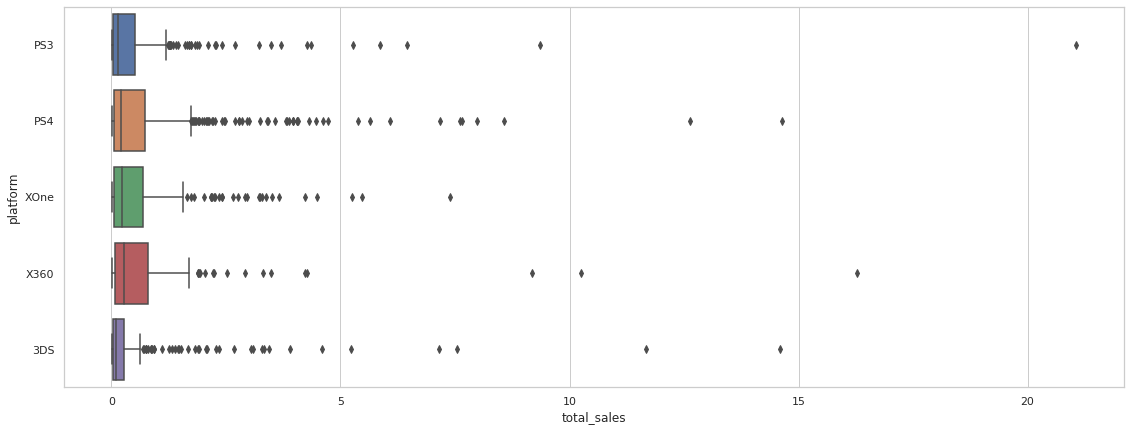

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize = (19, 7))
sns.boxplot(data = games_actual_data.query('platform == ["PS4", "PS3", "XOne", "3DS", "X360"]') \
            .sort_values(by = 'total_sales'), y = 'platform', x = 'total_sales')

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Как ты думаешь, с чем связаны выбросы? Топовые игрушки какие-нибудь?</div>

In [34]:
games_actual_data.query('platform == ["PS4", "PS3", "XOne", "3DS", "X360"]')['total_sales'].describe()

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

In [35]:
games_actual_data.query('platform == "PS4"')['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [36]:
games_actual_data.query('platform == "PS3"')['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

In [37]:
games_actual_data.query('platform == "XOne"')['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [38]:
games_actual_data.query('platform == "3DS"')['total_sales'].describe()

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

In [39]:
games_actual_data.query('platform == "X360"')['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

<i>Глобальные продажи в разбивке по платформам отличаются. Для PS4, PS3 и 3DS видна положительная динамика к росту продаж. Mean больше Q3, это значит к этим платформам производят более популярные и продаваемые игры, чем на XOne и X360.</i>

<b>
    Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
</b>

In [40]:
PS4_games_actual_data = games_actual_data.query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']]

In [41]:
games_actual_data.query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']].head()

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [42]:
games_actual_data.query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


<i>
Обычно при значениях от -0.3 до 0.3 можно говорить о том, что зависимость отсутствует. Сделаем вывод, что есть прямая корреляция между прибылью и оценкой критиков. Обратная корреляция по оценке пользователей характеризуется как отсутсвие зависимости. Т.е. оценка пользователей не оказывает влияние на продажи, в то время как оценка критиков может влиять на получение прибыли.
</i>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Интересный результат, всегда казалось, что пользователи наоборот больше оказывают влияние
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88e82ac90>,
      dtype=object)

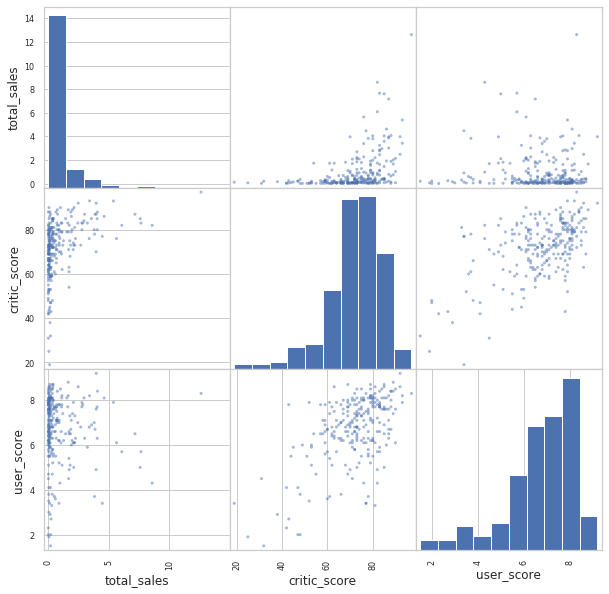

In [43]:
pd.plotting.scatter_matrix(games_actual_data.query('platform == "PS4"').loc[:,['total_sales', 'critic_score', 'user_score']], figsize=(10, 10))

<b>
    Проверим данный вывод с продажами игр на других платформах:
</b>

'PS4'

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


'PS3'

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


'XOne'

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


'3DS'

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


'X360'

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


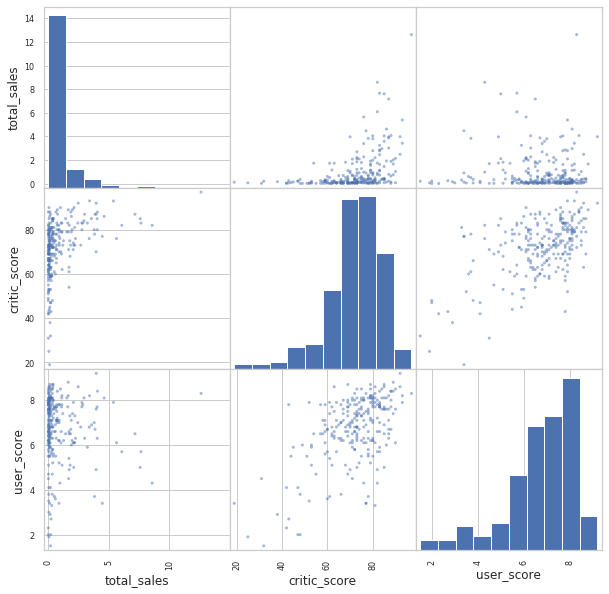

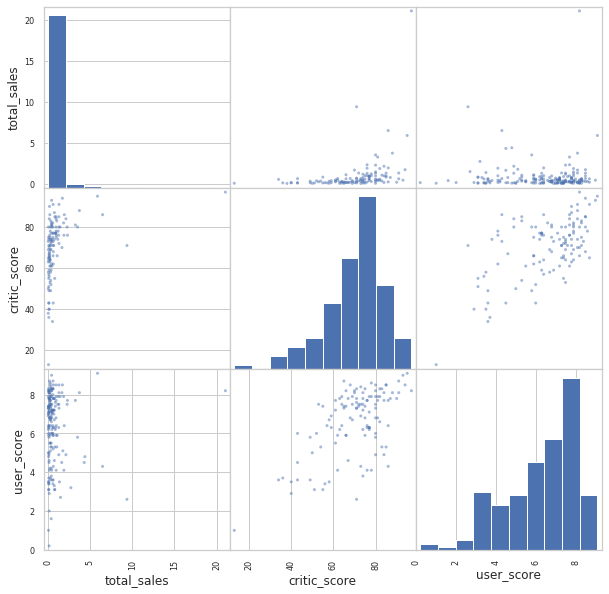

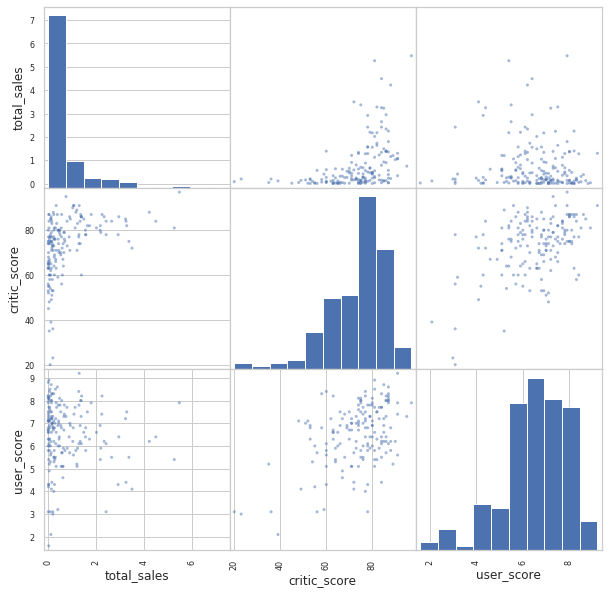

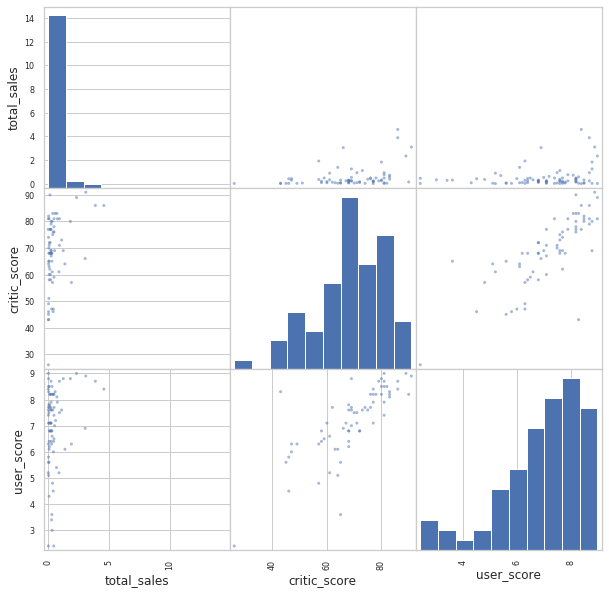

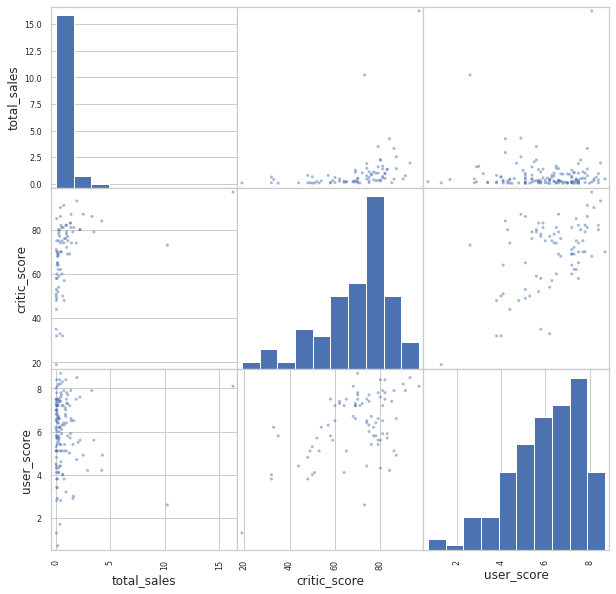

In [44]:
top_platform = ["PS4", "PS3", "XOne", "3DS", "X360"]
for row in top_platform:
    data = games_actual_data.query('platform == @row').loc[:,['total_sales', 'critic_score', 'user_score']].corr()
    pd.plotting.scatter_matrix(games_actual_data.query('platform == @row').loc[:,['total_sales', 'critic_score', 'user_score']], figsize=(10, 10))
    display(row, data)

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, классно автоматизировал построение графиков с помощью цикла</div>

<i>
Платформа XOne имеет похожую зависимость с PS4. Остальные платформы отличаются по прямой зависимости от оценки критиков в равной степени, у платформы 3DS можно увидеть что есть небольшая прямая зависимость от оценки пользователей.
</i>

<b>
Посмотрим на общее распределение игр по жанрам. Проверим, выделяются ли жанры с высокими и низкими продажами?
</b>

In [45]:
games_actual_data.pivot_table(index = ['genre',], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<i>
    
На основании полученной таблицы можно сказать что жанры `Action`, `Shooter`, `Sports`, `Role-Playing` и  `Misc` имеют высокие продажи. На нижних ступенях нашего рейтинга находятся `Simulation`, `Strategy`  и `Puzzle` .
    
</i>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Как ты считаешь, с чем это связано?</div>

<i>

Подытожим исследовательскй анализ данных:
* Как видим, данные за все периоды нам не важны.  Таким образом можно рассматривать данные в периоде с 1993 по 2016 год.
* В среднем платформа живет около 10 лет. Платформы и ТОП5 продаж появились с 2000 по 2006 год.
* Актуальным для планирования является планируемый год минус половина жизни платформ (2017 - 5 = 2012 год). 
* Пятерка лидеров по продажам: PS4, PS3, XOne, 3DS и X360. Суммарные продажи которых с 2012 года приближаются к 1 млд. $ Продажи растут у PS4 и XOne.
* Глобальные продажи в разбивке по платформам отличаются. Для PS4, PS3 и 3DS видна положительная динамика к росту продаж. Mean больше Q3, это значит к этим платформам производят более популярные и продаваемые игры, чем на XOne и X360.
* Платформа XOne имеет похожую зависимость с PS4 продаж  от оценки критиков. Остальные платформы отличаются по прямой зависимости от оценки критиков в равной степени, у платформы 3DS можно увидеть что есть небольшая прямая зависимость от оценки пользователей.
* Жанры Action, Shooter, Sports, Role-Playing и Misc имеют высокие продажи. На нижних ступенях нашего рейтинга находятся Simulation, Strategy и Puzzle .

</i>

# Шаг 4. Составим портрет пользователя каждого региона

<b>

Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5).    

</b>

In [46]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for row in region:
    data = games_actual_data.pivot_table(index = ['platform',], values = row, aggfunc = 'sum').sort_values(row, ascending = False)
    display(data.head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


<i>
    
Самые популярные платформы для:
* Северной Америки: PS4, XOne, X360, PS3 и 3DS;
* Европейского региона: PS4, PS3, XOne, X360 и 3DS;
* Японии: 3DS, PS3, PSV, PS4 и WiiU.
    
</i>

<b>
Найдем по каждому региону популярный жанр:
</b>

In [47]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for row in region:
    data = games_actual_data.pivot_table(index = ['genre',], values = row, aggfunc = 'sum').sort_values(row, ascending = False)
    display(data.head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


<i>
    
Самые популярные жанры для:
* Северной Америки: Action, Shooter, Sports, Role-Playing и Misc;
* Европейского региона: Action, Shooter, Sports, Role-Playing и Racing;
* Японии: Role-Playing, Action, Misc, Fighting и Shooter.
    
</i>

<b>
Найдем влияние рейтинга на каждый регион:
</b>


In [48]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for row in region:
    data = games_actual_data.pivot_table(index = ['rating',], values = row, aggfunc = 'sum').sort_values(row, ascending = False)
    display(data.head())

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


<i>

Расшифруем получившиеся данные определяющие возрастной рейтинг компьютерных игр: 
* М - материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;
* Е - содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера;
* Е10+ - проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
* Т - игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

</i>

<i>

* В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. 
* В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.
    
</i>




<i>Согласно анализу целевую аудиторию игроков можно поделить следующим образом:

* Американский игрок - возраст от 17 лет, отдает претпочтение платформам PS4 или XOne, любит игры жанра Action, Shooter;
* Европейский игрок - возраст от 17 лет, любит играть на PlayStation, предпочитает игры на Action, Shooter;
* Японский игрок - возраст от 13 лет, любит играть на переносных платформах 3DS или PSV, консоле PS3, время проводит за играми жара Role-Playing, Action.

</i>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, интересно, что значимые отличия можно легко заметить во вкусовых предпочтениях у разных наций. Как ты думаешь из-за чего это?
</div>

# Шаг 5. Проверим гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<i>
За нулевую гипотезу примем что средние пользовательские ретинги платформ Xbox One и PC равны, тогда альтернативная гипотеза будет звучать как средние пользовательские ретинги платформ Xbox One и PC не равны. 
Проверим:

</i>

In [51]:
user_rating_XOne = games_actual_data.query('platform == "XOne"')['user_score'].dropna()
user_rating_PC = games_actual_data.query('platform == "PC"')['user_score'].dropna()

In [54]:
alpha = .01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.14012764978158274
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-warning">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
При проведении теста забыл указать важный параметр --- equal_vars</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Круто было бы визуализировать распределение рейтингов
</div>

<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Заметь, что при выборе другого временного среза результат мог бы быть вполне другим
</div>

<i>
Результат "Не получилось отвергнуть нулевую гипотезу" говорит о том, что рейтинги по средним пользовательским рейтингам платформ Xbox One и PC одинаковые.
</i>

<i>Теперь рейтинги: За нулевую гипотезу примем что ретинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны, тогда альтернативная гипотеза будет звучать как средние пользовательские ретинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны. Проверим:</i>

In [55]:
user_rating_Action = games_actual_data.query('genre == "Action"')['user_score'].dropna()
user_rating_Sports = games_actual_data.query('genre == "Sports"')['user_score'].dropna()

In [56]:
alpha = .01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.0517786467865278e-27
Отвергаем нулевую гипотезу


<i>
Результат "Отвергаем нулевую гипотезу" говорит о том, что рейтинги по средним пользовательским рейтингам жаров не одинаковые.
</i>

<i>

Обе гипотезы методом t-критерия Стьюдента подтвердились.

</i>


<i>
При формировании нулевой и альтернативной гипотезы использовали принцип, что основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияние фактора, отсутствие эффекта и т.д. является верным, а альтернативная гипотеза принимаются тогда и только тогда, когда опровергается нулевая гипотеза.

</i>

<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, ты верно ставишь гипотезы и проводишь статистические тесты</div>

# Шаг 6. Напишем общий вывод

<b>
    В процессе выполнения проекта были выявлены следующие определяющие успешность игры закономерности. В виде рекомендаций, для планирования рекламных компаний и ставки на потенциально популярный продукт, это будет выглядеть следующим образом:

* Пятерка лидеров по продажам: PS4, PS3, XOne, 3DS и X360. Суммарные продажи которых с 2012 года приближаются к 1 млд. $ Продажи растут у PS4 и XOne;
* Жанры Action, Shooter, Sports, Role-Playing и Misc имеют высокие продажи;
* По направлению продаж в Северной Америке ориентируемся на рынок игр сегмента жанра Action и Shooter на платформах PS4 или XOne, возростной категории от 17 лет;
* По направлению продаж в Европейской части ориентируемся на рынок игр сегмента жанра Action и Shooter на платформах PS4 и PS3, возростной категории от 17 лет;
* Продажи в Японии должны быть более ориентированы на игроков от 13 лет отдающим предпочтения жанрам Role-Playing и Action использующим платформу 3DS и PS3.
</b>

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

-Спасибо за качественно сделанный проект, было приятно проверять. 

- Видно, что приложено много усилий

- Код написан хорошо 

- Соблюдена структура проекта 

- Не забывай анализировать полученные результаты
    
- Также оставил пару замечаний и советов


Удачи!

</div>